# To-do list

## Metalicty

# To look into list
Hierarchical model <br>
Varitational inference <br>
Different samplers - HMC <br>
Posterior predictive checks 
Use Gyrs 



# rotaation bv and age observers GC
# period age mass and metalictty fundemental GC


In [1]:
!pip install arviz==0.11.0
!pip install pymc3==3.11.1
!pip install PyAstronomy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy
import pandas as pd

import pymc3 as pm
import theano as tt
import arviz 
pd.options.display.max_rows = 4000
 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib  import cm
from PyAstronomy import pyasl

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

print(f"Running on PyMC3 v{pm.__version__}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running on PyMC3 v3.11.1


In [3]:
def mean_fn(t, B, A, c, h, f):
  return A * (t)**c  * (B-h)**f


def log_mean_fn(log_Age, BV, A,c,h,f):
  return np.log(A) +c*log_Age + f*np.log(BV-h)








def log_err(vals, val, err_lo):
  return np.mean(np.log(vals)) - np.log(np.mean(vals)- err_lo) ## this works 



#def log_err(vals, val, err_lo):
 # return np.log(val) - np.log(val- err_lo)


#def lin_err(vals, val, err_lo):
#  return val * log_err(vals, val, err_lo)

def lin_err(val, sig_hi, sig_lo):
  return (sig_hi +sig_lo)/2
  

In [4]:
##### OPTIONS #####
#data1 16th points = 91 total






data = pd.read_csv('/content/drive/My Drive/data/real_data.csv', header=0)
flag = np.array(data['flag'])

Teff = np.array(data['Teff'])

Teff_err = np.array(data['eTeff'])

Age = np.array(data['age']) # convert to Megayrs
Age_err_lo = np.array(data['loage'])
Age_err_hi = np.array(data['upage'])

Prot = np.array(data['P'])
Prot_err_lo = np.array(data['l_P'])
Prot_err_hi = np.array(data['u_P'])

b = pyasl.BallesterosBV_T()
data_points = Prot.shape[0]


#Prot_err = np.array([lin_err(Prot, Prot[i], Prot_err_lo[i]) for i in range(data_points)])
#Age_err = np.array([lin_err(Age, Age[i], Age_err_lo[i]) for i in range(data_points)])

Age_err = np.array([lin_err(Age[i], Age_err_lo[i], Age_err_hi[i]) for i in range(data_points)])
Prot_err = np.array([lin_err(Prot[i], Prot_err_lo[i], Prot_err_hi[i]) for i in range(data_points)])


sel_good = np.where((Age > 0.5)& (Prot_err < 40)) # select stars that arent too young and have 'sensible' error

sel_bad = np.where((Prot < 5)& (Prot_err < 40)&(Age>5)) # Remove old stars that spin too fast

sel = (np.delete(sel_good, sel_bad))



Teff = Teff[sel]
Teff_err = Teff_err[sel]
Age = Age[sel]
Age_err_lo = Age_err_lo[sel]
Age_err_hi = Age_err_hi[sel]
Age_err = Age_err [sel]

Prot = Prot[sel]
Prot_err_lo = Prot_err_lo[sel]
Prot_err_hi = Prot_err_hi[sel]
Prot_err = Prot_err [sel]

BV =  b.t2bv(np.array(Teff))

BV_err = Teff_err/Teff * BV

data_points = Prot.shape[0]

print('Using: ',data_points)
print('From: ',data.shape)


Using:  91
From:  (94, 27)


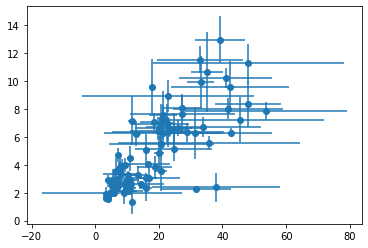

[ 0.09896664  0.10449709  0.1533777   0.16307147  0.21702951  0.24456392
  0.26752853  0.31806106  0.35731777  0.37481226  0.45559958  0.48252665
  0.49973618  0.51047451  0.51274558  0.51576927  0.52440865  0.5319714
  0.55697289  0.58397748  0.59212969  0.60819583  0.65798852  0.67727593
  0.68925145  0.72398305  0.73657433  0.78167618  0.93546604  0.99545336
  1.01004423  1.01742008  1.14356405  1.16431968  1.31998598  1.36004331
  1.40514525  1.54496817  1.57393961  1.64148053  1.64161215  1.94157594
  1.99655309  2.00864621  2.04398235  2.14367426  2.3985912   2.5167709
  2.61550219  3.23677147  3.41642965  3.68487884  4.09903918  4.17186095
  4.26738676  4.29152901  4.46553991  4.51899728  4.99462094  5.57171239
  5.61963896  5.6736072   6.37284641  6.82834684  7.17901511  7.72419753
  7.84549381  8.81341549  8.99442345 10.39939871 10.57585749 10.68987708
 11.02918412 12.17205726 13.02032401 13.53041853 14.65612622 16.48972192
 16.51971961 17.25592595 17.53369695 18.01682535 18.4

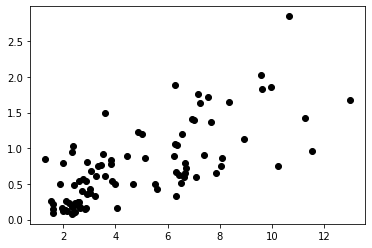

In [5]:




plt.errorbar(Prot, Age,yerr=Age_err,xerr=Prot_err,fmt='o')
plt.show()
plt.plot(Age, np.abs(Age_err), 'ok')

print(np.sort(Prot_err))

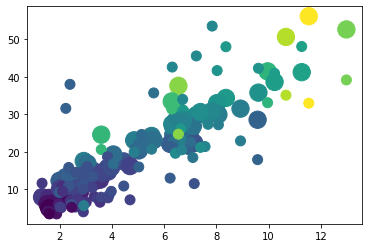

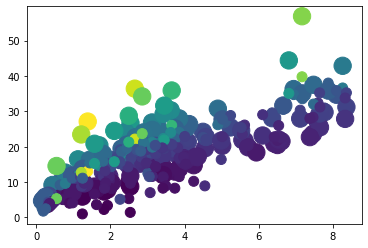

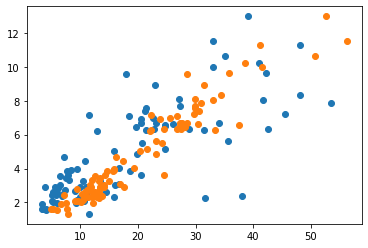

In [6]:
X = np.array([Age, BV]).T 
h = 0.4 
f = 0.601 
c = 0.52
A = 0.7725 * np.sqrt(1000)


b = pyasl.BallesterosBV_T()



Prot_guess  = mean_fn(X[:,0], X[:,1], A, c,h,f)
plt.scatter(X[:,0], Prot_guess,s=300, c=X[:,1], cmap = cm.viridis, label='model')
#plt.show()
plt.scatter(Age, Prot, c=BV,s=100,cmap = cm.viridis, label='data')

plt.show()


data2 = np.genfromtxt('/content/drive/My Drive/data/data1.csv', delimiter=',', skip_header=1)
smp_rt=10
Teff2 = data2[:,0][0::smp_rt] # Teff
Prot2 = data2[:, 1][0::smp_rt]  # Prot
Age2 = data2[:, 2][0::smp_rt]  # Age 
BV2 = b.t2bv(np.array(Teff2))

Prot_guess2 = mean_fn(Age2, BV2, A,c,h,f)

plt.scatter(Age2, Prot_guess2,s=300, c=BV2, cmap = cm.viridis, label='model')
plt.scatter(Age2, Prot2, c=BV2,s=100,cmap = cm.viridis, label='data')
plt.show()



plt.scatter(Prot, Age)
plt.scatter(Prot_guess,Age)

https://iopscience.iop.org/article/10.1088/0004-637X/695/1/679/pdf
In this article a form is given to determine P from Bv and age that is of a slightly sifferent form to what I am currently using.
$P(t, B-V) = t^{0.52} g(B-V -h)^f$ <br>
where $g=0.77, h=0.4, f = 0.6$. I will now construct another GP using this as the mean function and see how it goes.

Im gonna sort of bash the BV dependance onto the end of my current mass, age mean function and see how it goes B). The new mean function will look like $P(t,m,(B-V)) = At^cm^d((B-V)-h)^f$. Where I a taking d from the previous GP, here A is going to be allowed to vary and the starting value will be $A^{\star}g$, where $A^{\star}$ is the A from before.  

This has resulted in considerably better results.


In [7]:
#### book ####


h = 0.4 
f = 0.601 
c = 0.5189 
A = 0.7725 * np.sqrt(1000) 

# fix barnes values 


X = np.array([Age, BV]).T 
print(X.shape)


with pm.Model() as model:
    #c_ = pm.Normal('c_', c, c*0.25)
    c_ = c
    #f_ = pm.Normal('f_', f, f*0.25)
    f_ = f
    #A_ = pm.Normal('A_', A, A*0.25)
    A_ = A
    
    Age_true = pm.Uniform('Age_true', 0, 14, shape=data_points)
    Age_obs = pm.Normal("Age_obs", Age_true, np.abs(Age_err), observed=X[:,0])


    

    BV_true = pm.Lognormal("BV_true", 1, 1, shape=data_points)
    BV_obs = pm.Normal("BV_obs", BV_true, np.abs(BV_err), observed=X[:,1])

    mean = mean_fn(Age_true, BV_true, A_,c_,h,f_)
    resid = Prot - mean
   
    l1 = pm.Normal('l1', mu=13, sigma=2)  # 20

    l2 = pm.Lognormal("l2", np.log(0.15), 0.1)
    #l2 = pm.Normal('l2', 0.15, 0.1)
    sf1 = pm.Normal('sf1', 10, 2)
    
    sf2 = pm.Lognormal("sf2", np.log(0.2), 0.1)
    #sf2 = pm.Normal('sf2', 0.2, 0.1)

    K1 = pm.gp.cov.ExpQuad(2, l1) * sf1**2
    K2 = pm.gp.cov.ExpQuad(2, l2) * sf2**2

    K = K1 * K2 # try multiply 


    gp = pm.gp.Marginal(cov_func=K)
    #x = tt.tensor.stack([Age_true, BV_true])

    obs = gp.marginal_likelihood("obs", X=X , y=resid, noise=np.abs(Prot_err))

    # big gp book says constnat plus a product of linear + white noise will do the trick




(91, 2)


In [ ]:

with model:
  trace = pm.sample(2000, tune=3000, cores=2, target_accept=0.95)
  arviz.plot_trace(trace)

In [ ]:
with model:
  print(arviz.summary(trace))


lst = trace.varnames
# list of all variables to sample posterior over
lst.append('f_pred')
vars = np.asarray(lst)

with model:
  f_pred = gp.conditional('f_pred', X, pred_noise=False) # predict function
  pred_samples = pm.sample_posterior_predictive(trace, var_names=vars,samples=2500)


In [ ]:

new_err = np.mean([ trace.get_values('Age_true')[:,i].std()/  trace.get_values('Age_true')[:,i].mean() for i in range(data_points)])
old_err =np.mean(np.abs(Age_err/Age))


print('Initianl error: ', old_err*100, '%')
print('New error: ', new_err*100,'%')
print("Difference in error = {}%  :)".format(round((new_err-old_err)*100,5)))


In [ ]:
print(trace.get_values('Age_true').shape)
Age_new = np.mean(trace.get_values('Age_true'), axis=0)
BV_new = np.mean(trace.get_values('BV_true'), axis=0)
print(Age_new.shape)

In [ ]:
 
'''
A = np.mean(trace['A_'])
c = np.mean(trace['c_'])
h = h
f = np.mean(trace['f_'])


'''

X = np.array([Age, BV]).T 
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()



fit, var = gp.predict(X, point=trace[-1], diag=True)
sd = np.sqrt(var)


mean = mean_fn(X[:,0], X[:,1], A, c ,h,f)

mu = fit + mean



## plotting the predictions, make a plot of age on x axis b-v on y, plot points and colour by age




plt.plot([],[], color='w',label='A = {}\n c = {}\n f = {}'.format(round(A,4), round(c,4), round(f,4)))
plt.scatter(X[:,0], mu, s=300, c=X[:,1], marker = 'X', cmap = cm.viridis, label='fit', edgecolors='k')
plt.xlabel('Age (Gyrs)', fontsize=16)
plt.ylabel('Rotational period (Days) ', fontsize=16)
plt.colorbar(label='BV')
plt.scatter(Age, Prot, c=BV, s=100, cmap = cm.viridis,label='data')
plt.legend()
plt.savefig('col_Ba.png')
files.download('col_Ba.png')
plt.show()

'''
fig = plt.figure(figsize=(12, 5))
plt.scatter(X[:,0], mu, s=300, c=X[:,1], marker = 's', cmap = cm.viridis, label='fit', edgecolors='k')
#plt.scatter(X[:,0], mu - fit, s=300, c=X[:,1], marker = 'o', cmap = cm.viridis, label='barnes',edgecolors='k')
plt.scatter(X[:,0], mean_fn(X[:,0], X[:,1], 0.7725*np.sqrt(1000), 0.5189, 0.4, 0.601), s=300, c=X[:,1], marker = 'X', cmap = cm.viridis, label='Barnes', edgecolors='k')
plt.xlabel('Age (Gyrs)', fontsize=16)
plt.ylabel('Rotational period (Days) ', fontsize=16)
plt.colorbar(label='BV')
plt.scatter(Age, Prot, c=BV, s=100, cmap = cm.viridis,label='data')



plt.legend()
plt.savefig('col_fit_comp.png')
files.download('col_fit_comp.png')

plt.show()
'''

In [ ]:
fit, var = gp.predict(X, point=trace[-1], diag=True)

#mu = mean + fit
std = np.sqrt(var) * np.sign(var)

vals = np.sort(np.array([mu, std, Prot]), axis=1)


age_fit_err = [trace.get_values('Age_true')[:,i].std() for i in range(trace.get_values('Age_true').shape[1])]
bv_fit_err = [trace.get_values('BV_true')[:,i].std() for i in range(trace.get_values('BV_true').shape[1])]


plt.errorbar(Prot, Age, yerr=Age_err, xerr=Prot_err, fmt='o', label='data')
plt.errorbar(vals[0,:], X[:,0], xerr=vals[1,:], yerr=age_fit_err, fmt='o', label='fitted')
plt.legend()
plt.show()


plt.errorbar(Prot, BV, yerr=BV_err, xerr=Prot_err, fmt='o', label='data')



order = np.argsort(X[:,1])


plt.errorbar(vals[0,:][order], X[:,1][order], xerr=vals[1,:][order], yerr=bv_fit_err, fmt='o', label='fitted')
plt.legend()
plt.show()


In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot([0, np.amax(vals[2,:])], [0, np.amax(vals[2,:])], linestyle='--', label='y=x', color='r')
plt.errorbar(vals[2,:], vals[0,:], yerr=vals[1,:], fmt='o', label=r'data - predictions', color='b', alpha=1)
plt.fill_between(vals[2,:], vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], alpha=0.3, label=r'$\sigma$',interpolate=True, color='blue')
plt.fill_between(vals[2,:], vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], alpha=0.2, label=r'$2\sigma$', interpolate=True, color='b')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.savefig("R_Ba.png")
files.download("R_Ba.png") 
plt.legend()
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.show()


Z = (vals[2,:] - vals[0, :])/(vals[1,:])
x = np.linspace(-5,5, 1000)
norm = 1/np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2) #N(0,1) to compare with Z 


plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(Z, density=True, label=r'$Z=(Data-Predictions)/\sigma$', color='limegreen', bins=20)
plt.plot(x,norm, label='N(0,1)', color='k', linestyle='--')
plt.legend()
plt.savefig("H_Ba.png")
files.download("H_Ba.png") 
plt.show()
print(Z.mean())


In [ ]:



print(np.mean(np.abs(Prot - vals[0,:]))) 

In [ ]:

### Fix B-V for sveral valuea and plot age vs roation for Barnes and GP. Should see that for Young stars, Barnes and GP agree fairly well as Barnes callibrated on young stars. On Older Barnes will be bad. GP has more flexibility. Should wee GP predicticint faster than Barnes.

#histogram of the differences between old uncertaintiy and new uncertainity(latent variables SD)
new_err = ([ trace.get_values('Age_true')[:,i].std()for i in range(data_points)])
old_err = Age_err
plt.hist(old_err - new_err)
plt.show()
plt.plot(old_err, new_err,'o')
plt.plot([0,3], [0,3])
plt.xlabel('old error')
plt.ylabel('New error')
plt.savefig('err_diff_Ba.png')
files.download('err_diff_Ba.png')
# give this a section 

In [ ]:
new_err = np.mean([ trace.get_values('Age_true')[:,i].std()/  trace.get_values('Age_true')[:,i].mean() for i in range(data_points)])
old_err =np.mean(np.abs(Age_err/Age))


print('Initianl error: ', old_err*100, '%')
print('New error: ', new_err*100,'%')
print("Difference in error = {}%  :)".format(round((new_err-old_err)*100,5)))


These two plots are evidence that this model does fit the data very well. We can use the parameters and hyper parameters gathered here for future GP implementations on true data. 

Second fast component t the gp when we dont have B-V